<a href="https://colab.research.google.com/github/Murilo11/Analise-de-Dados-Portal-de-Transparencia/blob/main/Analise_De_Dados_do_Portal_da_Transparencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carregando os Dados


In [1]:
caminho_dados = "/content/drive/MyDrive/AD- ASIMOV/2024_Viagem.csv"

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
#Lendo Os dados
df_viagens = pd.read_csv(caminho_dados, encoding="Windows-1252", sep=";", decimal=',')
#Criando nova coluna dispesas
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']
# ajustando valores nulo na coluna de cargo
df_viagens['Cargo']= df_viagens['Cargo'].fillna("Não indetificado")

# Convertendo colunas de datas
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format="%d/%m/%Y")
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format="%d/%m/%Y")
#criando novas colunas de datas
df_viagens['Mes da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias da viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days


In [3]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,Dias da viagem
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,"Instituto Federal de Educação, Ciência e Tecno...",***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.0,0.0,929.18,February,2
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,0.00,January,4
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,0.00,February,4
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,0.00,April,4
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.0,0.0,21068.69,January,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792808,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.0,0.0,262.05,December,0
792809,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.0,0.0,5248.78,December,1
792810,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-26,2024-12-27,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.0,0.0,0.00,December,1
792811,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.0,0.0,5562.82,December,2


# Acessando e manipulando colunas

In [4]:
df_viagens["Nome do órgão superior"]

,Nome do órgão superior
0,Ministério da Educação
1,Ministério da Educação
2,Ministério da Educação
3,Ministério da Educação
4,Ministério da Educação
...,...
792808,Banco Central do Brasil - Orçamento Fiscal e S...
792809,Banco Central do Brasil - Orçamento Fiscal e S...
792810,Banco Central do Brasil - Orçamento Fiscal e S...
792811,Banco Central do Brasil - Orçamento Fiscal e S...


In [5]:
df_viagens['Valor diárias']

,Valor diárias
0,929.18
1,0.00
2,0.00
3,0.00
4,14176.38
...,...
792808,262.05
792809,1204.09
792810,0.00
792811,0.00


In [6]:
colunas = ['Nome do órgão superior', 'Valor diárias']
df_viagens[colunas]

,Nome do órgão superior,Valor diárias
0,Ministério da Educação,929.18
1,Ministério da Educação,0.00
2,Ministério da Educação,0.00
3,Ministério da Educação,0.00
4,Ministério da Educação,14176.38
...,...,...
792808,Banco Central do Brasil - Orçamento Fiscal e S...,262.05
792809,Banco Central do Brasil - Orçamento Fiscal e S...,1204.09
792810,Banco Central do Brasil - Orçamento Fiscal e S...,0.00
792811,Banco Central do Brasil - Orçamento Fiscal e S...,0.00


In [7]:
df_viagens["Nome do órgão superior"].str.upper().str.replace('MINISTÉRIO', 'MIN')

,Nome do órgão superior
0,MIN DA EDUCAÇÃO
1,MIN DA EDUCAÇÃO
2,MIN DA EDUCAÇÃO
3,MIN DA EDUCAÇÃO
4,MIN DA EDUCAÇÃO
...,...
792808,BANCO CENTRAL DO BRASIL - ORÇAMENTO FISCAL E S...
792809,BANCO CENTRAL DO BRASIL - ORÇAMENTO FISCAL E S...
792810,BANCO CENTRAL DO BRASIL - ORÇAMENTO FISCAL E S...
792811,BANCO CENTRAL DO BRASIL - ORÇAMENTO FISCAL E S...


#Operações entre colunas e tipos de dado
Conversão de texto para numeros


In [8]:
df_viagens[['Valor diárias', 'Valor passagens']]

,Valor diárias,Valor passagens
0,929.18,0.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,14176.38,6892.31
...,...,...
792808,262.05,0.00
792809,1204.09,4044.69
792810,0.00,0.00
792811,0.00,5562.82


In [9]:
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792813 entries, 0 to 792812
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Identificador do processo de viagem  792813 non-null  int64         
 1   Número da Proposta (PCDP)            792813 non-null  object        
 2   Situação                             792813 non-null  object        
 3   Viagem Urgente                       792813 non-null  object        
 4   Justificativa Urgência Viagem        792590 non-null  object        
 5   Código do órgão superior             792813 non-null  int64         
 6   Nome do órgão superior               792813 non-null  object        
 7   Código órgão solicitante             792813 non-null  int64         
 8   Nome órgão solicitante               792813 non-null  object        
 9   CPF viajante                         661166 non-null  object        
 

In [10]:
df_viagens['Valor diárias'] = df_viagens['Valor diárias'].replace(',', '.').astype(float)

In [11]:
df_viagens['Valor diárias']

,Valor diárias
0,929.18
1,0.00
2,0.00
3,0.00
4,14176.38
...,...
792808,262.05
792809,1204.09
792810,0.00
792811,0.00


In [12]:
df_viagens['Valor passagens']= df_viagens['Valor passagens'].replace(',', '.').astype(float)
df_viagens['Valor devolução ']= df_viagens['Valor devolução'].replace(',', '.').astype(float)
df_viagens['Valor outros gastos']= df_viagens['Valor outros gastos'].replace(',', '.').astype(float)

In [13]:
df_viagens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792813 entries, 0 to 792812
Data columns (total 26 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Identificador do processo de viagem  792813 non-null  int64         
 1   Número da Proposta (PCDP)            792813 non-null  object        
 2   Situação                             792813 non-null  object        
 3   Viagem Urgente                       792813 non-null  object        
 4   Justificativa Urgência Viagem        792590 non-null  object        
 5   Código do órgão superior             792813 non-null  int64         
 6   Nome do órgão superior               792813 non-null  object        
 7   Código órgão solicitante             792813 non-null  int64         
 8   Nome órgão solicitante               792813 non-null  object        
 9   CPF viajante                         661166 non-null  object        
 

In [14]:
df_viagens['Valor diárias'] + df_viagens['Valor passagens']

,0
0,929.18
1,0.00
2,0.00
3,0.00
4,21068.69
...,...
792808,262.05
792809,5248.78
792810,0.00
792811,5562.82


#Contando frequencias
Analisando a frequencia de viagens por cargo

In [15]:
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

In [16]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,Dias da viagem,Valor devolução
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,"Instituto Federal de Educação, Ciência e Tecno...",***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.0,0.0,929.18,February,2,0.0
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,0.00,January,4,0.0
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,0.00,February,4,0.0
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.0,0.0,0.00,April,4,0.0
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.0,0.0,21068.69,January,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792808,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.0,0.0,262.05,December,0,0.0
792809,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.0,0.0,5248.78,December,1,0.0
792810,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-26,2024-12-27,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.0,0.0,0.00,December,1,0.0
792811,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.0,0.0,5562.82,December,2,0.0


In [17]:
(df_viagens['Cargo'].value_counts(normalize=True) * 100).rename('Porcentagem de Viagens ').reset_index()

,Cargo,Porcentagem de Viagens
0,Não indetificado,38.729688
1,Informações protegidas por sigilo,14.930885
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.582384
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.412642
4,CONTRATADO LEI 8745/93 - NI,2.169364
...,...,...
851,ANALISTA DE O E M,0.000126
852,GUARDA DE PRESIDIO CIVIL TERCEIRA,0.000126
853,TECNICO EQUIPAMENTO MEDICO ODONTOLOGICO,0.000126
854,ANALISTA I - 40HORAS,0.000126


#Criando Novas tabelas e agrupando dados por cargo

In [18]:
pd.set_option('display.float_format','{:.2f}'.format)
df_viagens.groupby('Cargo')['Despesas'].sum().reset_index().sort_values(by='Despesas', ascending=False)

,Cargo,Despesas
522,Não indetificado,1097266159.61
466,Informações protegidas por sigilo,406498109.17
600,PROFESSOR DO MAGISTERIO SUPERIOR,116333953.97
601,PROFESSOR ENS BASICO TECN TECNOLOGICO,53289458.08
719,TECNICO DO SEGURO SOCIAL,45034315.81
...,...,...
362,DIRETOR DE ILUMINACAO,122.05
367,DIVULGADOR SANITARIO,122.05
539,OPERADOR DE CENTRAL HIDRELETRICA,0.00
599,PROFESSOR DO ENSINO BASICO EX-TERRITORIO,0.00


In [19]:
viagens_por_cargo = (df_viagens['Cargo'].value_counts(normalize=True) * 100).rename('Porcentagem de Viagens ').reset_index()

#Séries booleanas e filtros


In [20]:
filtro_mais_de_1_pct = viagens_por_cargo['Porcentagem de Viagens '] > 1

In [21]:
viagens_por_cargo

,Cargo,Porcentagem de Viagens
0,Não indetificado,38.73
1,Informações protegidas por sigilo,14.93
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.58
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.41
4,CONTRATADO LEI 8745/93 - NI,2.17
...,...,...
851,ANALISTA DE O E M,0.00
852,GUARDA DE PRESIDIO CIVIL TERCEIRA,0.00
853,TECNICO EQUIPAMENTO MEDICO ODONTOLOGICO,0.00
854,ANALISTA I - 40HORAS,0.00


In [22]:
viagens_por_cargo[filtro_mais_de_1_pct]

,Cargo,Porcentagem de Viagens
0,Não indetificado,38.73
1,Informações protegidas por sigilo,14.93
2,PROFESSOR DO MAGISTERIO SUPERIOR,6.58
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,4.41
4,CONTRATADO LEI 8745/93 - NI,2.17
5,AUDITOR FISCAL FEDERAL AGROPECUARIO,2.04
6,ANALISTA AMBIENTAL,1.64
7,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,1.41
8,ASSISTENTE EM ADMINISTRAçãO,1.33
9,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,1.27


In [23]:
filtro_eh_tecnico = viagens_por_cargo['Cargo'].str.startswith('TECNICO')

In [24]:
viagens_por_cargo[filtro_eh_tecnico & filtro_mais_de_1_pct]

,Cargo,Porcentagem de Viagens
10,TECNICO DO SEGURO SOCIAL,1.20


In [25]:
viagens_por_cargo[filtro_eh_tecnico]

,Cargo,Porcentagem de Viagens
10,TECNICO DO SEGURO SOCIAL,1.20
11,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,0.99
13,TECNICO AMBIENTAL,0.71
19,TECNICO ADMINISTRATIVO,0.46
25,TECNICO EM ASSUNTOS EDUCACIONAIS,0.34
...,...,...
839,TECNICO ESP SERV ECONOM,0.00
842,TECNICO DE SISTEMAS,0.00
846,TECNICO DE ENFERMAGEM III,0.00
848,TECNICO PROMOCAO DIVULGACAO CULTURAL II,0.00



#Lidando com dados nulos

In [26]:
df_viagens['Cargo'].value_counts(dropna=False)

,count
Cargo,
Não indetificado,307054
Informações protegidas por sigilo,118374
PROFESSOR DO MAGISTERIO SUPERIOR,52186
PROFESSOR ENS BASICO TECN TECNOLOGICO,34984
CONTRATADO LEI 8745/93 - NI,17199
...,...
ANALISTA DE O E M,1
GUARDA DE PRESIDIO CIVIL TERCEIRA,1
TECNICO EQUIPAMENTO MEDICO ODONTOLOGICO,1


In [27]:
df_viagens['Cargo']= df_viagens['Cargo'].fillna("Não indetificado")
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,Dias da viagem,Valor devolução
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,"Instituto Federal de Educação, Ciência e Tecno...",***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00,929.18,February,2,0.00
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,21068.69,January,8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792808,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00,262.05,December,0,0.00
792809,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,5248.78,December,1,0.00
792810,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-26,2024-12-27,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.00,0.00,0.00,December,1,0.00
792811,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00,5562.82,December,2,0.00


#Trabalhando com datas

In [28]:
pd.to_datetime(df_viagens['Período - Data de início'], format="%d/%m/%Y")

,Período - Data de início
0,2024-02-23
1,2024-01-18
2,2024-02-29
3,2024-04-11
4,2024-01-29
...,...
792808,2024-12-16
792809,2024-12-17
792810,2024-12-26
792811,2024-12-29


In [29]:
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format="%d/%m/%Y")
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format="%d/%m/%Y")
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,Dias da viagem,Valor devolução
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,"Instituto Federal de Educação, Ciência e Tecno...",***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00,929.18,February,2,0.00
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,21068.69,January,8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792808,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00,262.05,December,0,0.00
792809,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,5248.78,December,1,0.00
792810,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-26,2024-12-27,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.00,0.00,0.00,December,1,0.00
792811,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00,5562.82,December,2,0.00


In [30]:
df_viagens['Mes da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,Dias da viagem,Valor devolução
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,"Instituto Federal de Educação, Ciência e Tecno...",***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00,929.18,February,2,0.00
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,21068.69,January,8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792808,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00,262.05,December,0,0.00
792809,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,5248.78,December,1,0.00
792810,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-26,2024-12-27,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.00,0.00,0.00,December,1,0.00
792811,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00,5562.82,December,2,0.00


In [31]:
df_viagens['Dias da viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,Dias da viagem,Valor devolução
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,"Instituto Federal de Educação, Ciência e Tecno...",***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00,929.18,February,2,0.00
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,21068.69,January,8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792808,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00,262.05,December,0,0.00
792809,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,5248.78,December,1,0.00
792810,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-26,2024-12-27,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.00,0.00,0.00,December,1,0.00
792811,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00,5562.82,December,2,0.00


# Combinando agregaçõoes e filtros

In [32]:

(df_viagens
 .groupby('Cargo')
 .agg(
     despesa_media=('Despesas', 'mean'),
     duracao_media=('Dias da viagem', 'mean'),
     despesas_totais=('Despesas', 'sum'),
     destino_mais_frequente=("Destinos", pd.Series.mode),
     n_viagens=('Nome', 'count')
     )
  .reset_index()
 )

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
0,AAD - AUXILIAR DE RECURSOS HUMANOS,132.55,0.00,265.09,"[Belo Horizonte/MG, Diamantina/MG]",2
1,AAD-AUX DE RECURSOS MATERIAIS,7505.14,14.40,37525.71,Foz do Iguaçu/PR,5
2,AAD-AUXILIAR ADMINISTRATIVO,3146.50,6.14,22025.51,Alcantil/PB,7
3,AAD-AUXILIAR DE INFORMATICA,3638.93,5.00,10916.80,"[Brasília/DF, Canoas/RS, Florianópolis/SC]",3
4,AAD-AUXILIAR DE OPERACOES,27581.28,51.18,303394.12,São Paulo/SP,11
...,...,...,...,...,...,...
851,VENDEDOR DE ARTESANATO,15278.72,47.60,76393.58,São Félix do Xingu/PA,5
852,VICE-PRESIDENTE DA REPUBLICA,9062.23,3.33,54373.36,"[Baku/Azerbaidjão, Cidade da Guatemala/Guatema...",6
853,VIGILANTE,1119.73,2.23,958490.94,Recife/PE,856
854,VISITADOR SANITARIO,1662.63,4.00,86456.76,Autazes/AM,52


In [33]:
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()
df_cargos

,Cargo,proportion
0,Não indetificado,0.39
1,Informações protegidas por sigilo,0.15
2,PROFESSOR DO MAGISTERIO SUPERIOR,0.07
3,PROFESSOR ENS BASICO TECN TECNOLOGICO,0.04
4,CONTRATADO LEI 8745/93 - NI,0.02
...,...,...
851,ANALISTA DE O E M,0.00
852,GUARDA DE PRESIDIO CIVIL TERCEIRA,0.00
853,TECNICO EQUIPAMENTO MEDICO ODONTOLOGICO,0.00
854,ANALISTA I - 40HORAS,0.00


In [34]:
df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']

,Cargo
0,Não indetificado
1,Informações protegidas por sigilo
2,PROFESSOR DO MAGISTERIO SUPERIOR
3,PROFESSOR ENS BASICO TECN TECNOLOGICO
4,CONTRATADO LEI 8745/93 - NI
5,AUDITOR FISCAL FEDERAL AGROPECUARIO
6,ANALISTA AMBIENTAL
7,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL
8,ASSISTENTE EM ADMINISTRAçãO
9,ANALISTA TRIBUTARIO REC FEDERAL BRASIL


In [35]:
df_viagens_consolidado = (
    df_viagens
 .groupby('Cargo')
 .agg(
     despesa_media=('Despesas', 'mean'),
     duracao_media=('Dias da viagem', 'mean'),
     despesas_totais=('Despesas', 'sum'),
     destino_mais_frequente=("Destinos", pd.Series.mode),
     n_viagens=('Nome', 'count')
     )
  .reset_index()
 )

In [36]:
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']

In [37]:
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

In [38]:
df_viagens_consolidado[filtro]

,Cargo,despesa_media,duracao_media,despesas_totais,destino_mais_frequente,n_viagens
91,ANALISTA AMBIENTAL,2820.79,5.20,36619490.27,Brasília/DF,12982
133,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,2053.92,3.42,20606987.95,Brasília/DF,10033
199,ASSISTENTE EM ADMINISTRAçãO,1520.96,2.31,16029360.80,Brasília/DF,10539
229,AUDITOR FISCAL FEDERAL AGROPECUARIO,1549.65,2.07,25096645.10,Brasília/DF,16195
230,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2934.63,3.14,32888427.54,Brasília/DF,11207
335,CONTRATADO LEI 8745/93 - NI,847.17,2.26,14570511.56,Fortaleza/CE,17199
466,Informações protegidas por sigilo,3434.02,7.44,406498109.17,Informações protegidas por sigilo,118374
522,Não indetificado,3573.53,7.64,1097266159.61,Brasília/DF,307054
600,PROFESSOR DO MAGISTERIO SUPERIOR,2229.22,4.01,116333953.97,Brasília/DF,52186
601,PROFESSOR ENS BASICO TECN TECNOLOGICO,1523.25,2.40,53289458.08,Brasília/DF,34984


# Gerando Graficos

In [39]:
df_final = df_viagens_consolidado[filtro]

In [40]:
from pickle import FALSE
df_final = df_final.sort_values(by="n_viagens", ascending=False)

<Axes: xlabel='Cargo'>

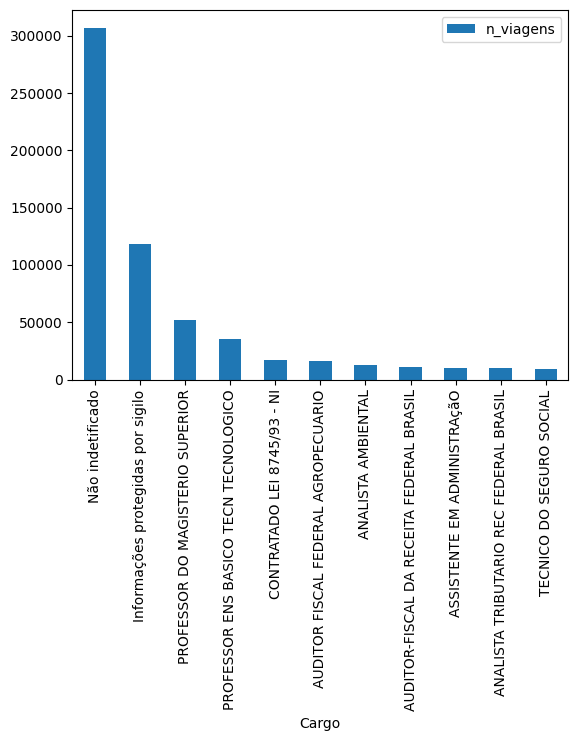

In [41]:
df_final.plot(x="Cargo", y="n_viagens", kind= "bar")

In [42]:
import matplotlib.pyplot as plt


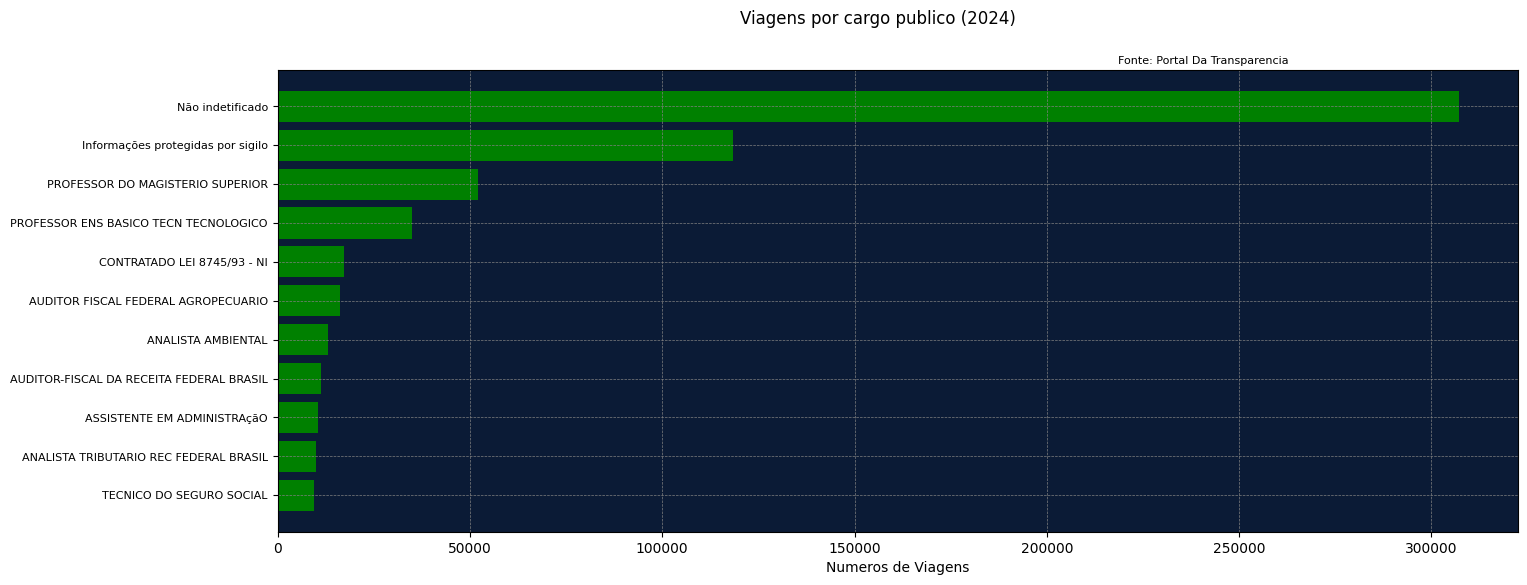

In [43]:
fig, ax = plt.subplots(figsize=(16,6))

ax.barh(df_final['Cargo'], df_final['n_viagens'], color= "Green")

ax.invert_yaxis()
ax.set_facecolor('#0b1b36')

fig.suptitle('Viagens por cargo publico (2024)')

plt.figtext(0.65, 0.89, 'Fonte: Portal Da Transparencia', fontsize=8)

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.yticks(fontsize=8)

plt.xlabel('Numeros de Viagens')

plt.show()


#Exploração de dados e união de tabelas

In [44]:
df_viagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,Dias da viagem,Valor devolução
0,18831091,000011/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26425,"Instituto Federal de Educação, Ciência e Tecno...",***.405.257-**,RICARDO DOS SANTOS PEREIRA,PROFESSOR ENS BASICO TECN TECNOLOGICO,-1,Sem informação,2024-02-23,2024-02-25,Rio Branco/AC,Ministrar a disciplina de Conceitos e Aplicaçõ...,929.18,0.00,0.00,0.00,929.18,February,2,0.00
1,18831495,000001/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-18,2024-01-22,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,January,4,0.00
2,18831777,000002/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-02-29,2024-03-04,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,February,4,0.00
3,18831821,000003/24,Realizada,NÃO,Sem informação,26000,Ministério da Educação,26274,Fundação Universidade Federal de Uberlândia,***.587.016-**,LETICIA SANCHEZ FERREIRA,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-04-11,2024-04-15,São Paulo/SP,Participação nas atividades do ESTAGIO DE CAPA...,0.00,0.00,0.00,0.00,0.00,April,4,0.00
4,19177818,000001/24-1C,Realizada,SIM,Inclusão das diárias.,26000,Ministério da Educação,26271,Fundação Universidade de Brasília,***.626.601-**,VIRGINIA MARIA VASCONCELOS LEAL,PROFESSOR DO MAGISTERIO SUPERIOR,-1,Sem informação,2024-01-29,2024-02-06,"Lille/França, Paris/França",Programação dos eventos que a Professora irá p...,14176.38,6892.31,0.00,0.00,21068.69,January,8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792808,2024001911,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.902.438-**,NAGEL LISANIAS PAULINO,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-16,2024-12-16,Sem informação,"Participar, como palestrante, no evento '1 ano...",262.05,0.00,0.00,0.00,262.05,December,0,0.00
792809,2024001912,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.697.505-**,EDSON BROXADO DE FRANCA TEIXEIRA,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-17,2024-12-18,Sem informação,Assessorar o Diretor de Fiscalização e cumprir...,1204.09,4044.69,0.00,0.00,5248.78,December,1,0.00
792810,2024001938,Sem informaçã,Não realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.827.438-**,GABRIEL MURICCA GALIPOLO,DIRETOR DO BANCO CENTRAL,-1,Sem informação,2024-12-26,2024-12-27,Sem informação,Cumprir agenda em Brasília.,0.00,0.00,0.00,0.00,0.00,December,1,0.00
792811,2024001946,Sem informaçã,Realizada,NÃO,Sem informação,25201,Banco Central do Brasil - Orçamento Fiscal e S...,25201,Banco Central do Brasil - Orçamento Fiscal e S...,***.425.230-**,GILNEU FRANCISCO ASTOLFI VIVAN,ANALISTA DO BANCO CENTRAL,-1,Sem informação,2024-12-29,2024-12-31,Sem informação,Suspensão das férias do servidor por motivo de...,0.00,5562.82,0.00,0.00,5562.82,December,2,0.00


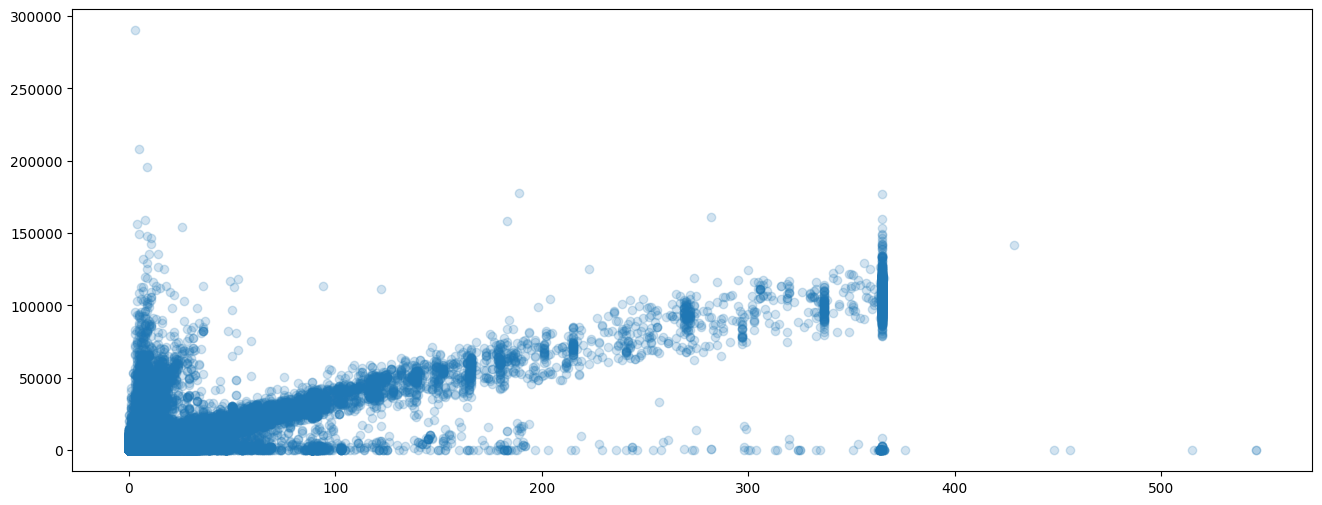

In [49]:
fig, ax = plt.subplots(figsize=(16,6))

ax.scatter(df_viagens['Dias da viagem'], df_viagens['Despesas'], alpha=0.2)
#ax.set_xlim(0, 100 )
#ax.set_ylim(0, 25_000)



In [51]:
(df_viagens['Despesas'] > 175_000).value_counts()

,count
Despesas,
False,792808
True,5


In [52]:
filtro_175k = df_viagens['Despesas'] > 175_000
df_viagens[filtro_175k]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mes da viagem,Dias da viagem,Valor devolução
9943,19668216,000844/24-17C,Realizada,SIM,"Face o DECRETO Nº 11.348, DE 1º DE JANEIRO DE ...",30000,Ministério da Justiça e Segurança Pública,30000,Ministério da Justiça e Segurança Pública - Un...,***.468.361-**,BRUNO REZENDE CABRAL,Não indetificado,-1,Sem informação,2024-01-01,2024-12-31,"Brasília/DF, Rio de Janeiro/RJ, Angra dos Reis...",Em continuidade a PCDP 051838/23 - Centro de C...,118425.85,58502.93,0.00,0.00,176928.78,January,365,0.00
241202,19961140,010529/24-1C,Realizada,SIM,Conforme Nota Técnica em anexo.,-1,Sem informação,-1,Sem informação,***.693.051-**,IRAJA REZENDE DE LACERDA,Não indetificado,CCX-0118,CCX-0118,2024-05-24,2024-06-02,"Xangai/China, Shenzhen/China",Participar de reuniões e encontro governamenta...,14281.65,180718.90,0.00,860.85,195861.40,May,9,0.00
263946,19989596,014282/24,Não realizada,NÃO,Sem informação,25000,Ministério da Fazenda,25000,Ministério da Fazenda - Unidades com vínculo d...,***.639.875-**,OLGA MARIA SILVA EMBIRUCU,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,-1,Sem informação,2024-06-12,2024-06-15,Rio de Janeiro/RJ,Foco na identificação das soluções tecnológica...,0.00,290096.16,0.00,0.00,290096.16,June,3,0.00
331227,20073775,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006400272,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2024-07-07,2025-01-12,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,153371.34,12503.74,0.00,11755.96,177631.04,July,189,0.00
359831,20109417,001426/24-2C,Realizada,SIM,Ajuste de dados.,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.050.944-**,CELSO LUIZ NUNES AMORIM,Não indetificado,CCX-0118,CCX-0118,2024-07-16,2024-07-21,Washington/Estados Unidos da América,Encontro com autoridades dos Estados Unidos da...,7675.59,199689.55,0.00,532.33,207897.47,July,5,0.00


In [54]:
caminho_dados_passagens = "/content/drive/MyDrive/AD- ASIMOV/2024_Passagem.csv"

df_passagens = pd.read_csv(caminho_dados_passagens, encoding='Windows-1252', sep=';', decimal=',')
df_passagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,19177818,000001/24-1C,Aéreo,Brasil,Distrito Federal,Brasília,França,NaN,Paris,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,6871.34,6.60,19/09/2023,18:53
1,19177818,000001/24-1C,Aéreo,França,NaN,Paris,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7.77,6.60,19/09/2023,18:53
2,19220977,000001/24-1C,Aéreo,Brasil,Paraná,Curitiba,Portugal,NaN,Porto,Portugal,NaN,Porto,Brasil,Paraná,Curitiba,8596.69,0.00,31/08/2023,14:49
3,19255612,000002/24,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:40
4,19255728,000001/24,Aéreo,Alemanha,NaN,Munique,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,4625.13,0.00,05/10/2023,17:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400014,2024001938,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,0.00,0.00,NaN,00:00
400015,2024001946,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,Rio Grande do Sul,Santo Ângelo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2032.42,0.00,NaN,00:00
400016,2024001946,Sem informaçã,Aéreo,Brasil,Rio Grande do Sul,Passo Fundo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3530.40,0.00,NaN,00:00
400017,2024001948,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2044.85,0.00,NaN,00:00


In [55]:
df_passagens[df_passagens['Identificador do processo de viagem'] == 20109417]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
203860,20109417,001426/24-2C,Aéreo,Estados Unidos da América,NaN,Washington,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,36612.25,18177.10,24/07/2024,14:33
203861,20109417,001426/24-2C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Washington,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,36612.25,18177.05,24/07/2024,14:33
203862,20109417,001426/24-2C,Aéreo,Estados Unidos da América,NaN,Washington,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,45055.45,0.00,13/08/2024,15:43
203863,20109417,001426/24-2C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Washington,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,45055.45,0.00,13/08/2024,15:43
